Adapted from: https://github.com/karpathy/micrograd/blob/master/demo.ipynb

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from micrograd.engine import Tensor
from micrograd.nn import MultiLayerPerceptron
from sklearn.datasets import make_moons

np.random.seed(1337)
random.seed(1337)

## Data

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1  # make y be -1 or 1

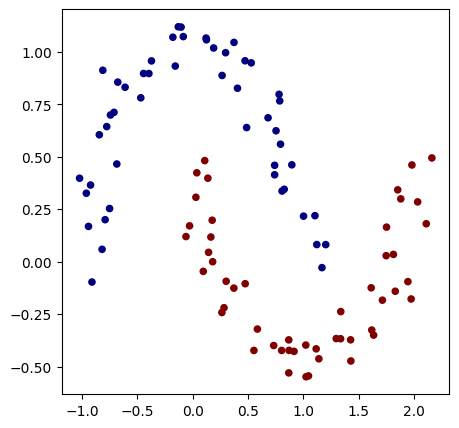

In [3]:
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

## Model

In [4]:
model = MultiLayerPerceptron(2, [16, 16, 1])  # 2-layer neural network
print("No. of params", sum([ p.numel() for p in model.parameters() ]))

No. of params 337


In [5]:
for layer in model.layers:
    print(layer, layer.weights.shape, layer.bias.shape)

Layer(16, act=relu) (2, 16) (16,)
Layer(16, act=relu) (16, 16) (16,)
Layer(1, act=None) (16, 1) (1,)


## Loss

In [6]:
# loss function
def svg_loss(batch_size=None):
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [Tensor(xrow) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = 0.0
    for p in model.parameters():
        reg_loss = reg_loss + (p * p).sum()
    reg_loss = alpha * reg_loss

    total_loss = data_loss  + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

## Training

In [7]:
# params
learning_rate_scldr = lambda k:  1e-2
loss = svg_loss
num_steps = 100

In [8]:
total_loss, acc = loss()
print(total_loss, acc)

Tensor(value=[1.01025448], shape=(1,), grad=[0.]) [0.48]


In [9]:
# optimization
for k in range(1, num_steps+1):
    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()
    
    learning_rate = learning_rate_scldr(k)

    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc * 100}%")

step 1 loss [1.01025448], accuracy [48.]%
step 2 loss [1.00964902], accuracy [48.]%
step 3 loss [1.00905962], accuracy [48.]%
step 4 loss [1.00846891], accuracy [48.]%
step 5 loss [1.00788041], accuracy [48.]%
step 6 loss [1.00731207], accuracy [48.]%
step 7 loss [1.0067442], accuracy [49.]%
step 8 loss [1.00618117], accuracy [50.]%
step 9 loss [1.00563555], accuracy [50.]%
step 10 loss [1.00509547], accuracy [50.]%
step 11 loss [1.00455849], accuracy [50.]%
step 12 loss [1.00402353], accuracy [51.]%
step 13 loss [1.00348808], accuracy [51.]%
step 14 loss [1.00295158], accuracy [51.]%
step 15 loss [1.00241668], accuracy [51.]%
step 16 loss [1.00188273], accuracy [51.]%
step 17 loss [1.00135327], accuracy [51.]%
step 18 loss [1.00083481], accuracy [53.]%
step 19 loss [1.00032061], accuracy [55.]%
step 20 loss [0.99981109], accuracy [56.]%
step 21 loss [0.9993069], accuracy [56.]%
step 22 loss [0.99881174], accuracy [57.]%
step 23 loss [0.99832718], accuracy [58.]%
step 24 loss [0.997847

## Visualize Decision Boundary

In [10]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [Tensor(xrow) for xrow in Xb]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

NameError: name 'Xb' is not defined